# Implementation of TensorFlow Neural Network for Classification

## Import Necessary Libraries

We start by importing the necessary libraries, including TensorFlow for building neural networks, Pandas for data manipulation, and other utility libraries.

In [1]:
#!pip install tensorflow (if tensorflow is not installed)
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Preview the Dataset

We load the dataset to get a sense of the data structure and its contents.

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Explore Dataset Information

We check the data types and look for any missing values or other issues in the dataset.

In [3]:
data.info()
# print(x_train.dtypes)
# print(data.isnull().sum())
# data.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Drop Unnecessary Columns

We remove the 'Surname' column since it is not relevant for model training.

In [4]:
data = data.drop(['Surname'], axis=1)

## Encode Categorical Variables

We convert categorical variables ('Geography' and 'Gender') into numerical values using `LabelEncoder`.

In [5]:
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

## Prepare Features and Target Variable

We define the feature matrix `x` and the target variable `y`.

In [6]:
x = data.drop(columns=['Exited'])
y = data['Exited']
# print(y.nunique())

## Split Data into Training and Testing Sets

We split the data into training and testing sets with a 70-30 ratio.

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=108)

## Build the Neural Network Model

We create a sequential neural network model with three layers: two hidden layers and an output layer.
We also print out a summary of the model architecture.

In [8]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=12))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

We compile the model using binary crossentropy loss and Adam optimizer.

In [9]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Train the Model

We train the model on the training data for 15 epochs.

In [10]:
hist = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.6238 - loss: 124077.5391
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.6906 - loss: 2440.5815
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.6896 - loss: 3704.8667
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.6810 - loss: 5206.8940
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.6924 - loss: 3657.2622
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.6849 - loss: 2685.0608
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.6952 - loss: 2879.8298
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.6819 - loss: 3967.0625
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.6838 - loss: 1813.5571
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.6860 - loss: 3200.8704


## Predict and Evaluate the Model

We make predictions on the test set and evaluate the model's performance using a confusion matrix, classification report, and accuracy score.

In [11]:
print(x_test.shape)
y_pred = model.predict(x_test)
print(x_test.shape)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cm)
print("Classification Report: ", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

(3000, 12)
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(3000, 12)
[0 0 0 ... 0 0 0]
Confusion Matrix: 
 [[2353    0]
 [ 647    0]]
Classification Report:                precision    recall  f1-score   support

           0       0.78      1.00      0.88      2353
           1       0.00      0.00      0.00       647

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.62      0.78      0.69      3000

Accuracy Score:  0.7843333333333333


## Visualize the Confusion Matrix

We plot the confusion matrix using a heatmap for better visualization.

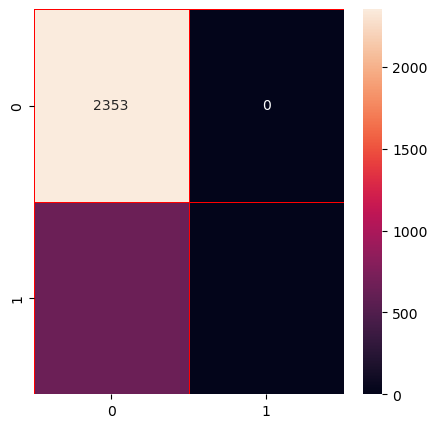

In [12]:
d,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.show()

## Load and Preview New Dataset and Reapeat the Steps

We now use the digits dataset from sklearn and repeat the steps.

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
data = pd.DataFrame(data=digits.data, columns=digits.feature_names)
data['output'] = digits.target
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,output
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [15]:
x = data.drop(columns=['output'])
y = data['output']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=108)

In [17]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=64))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,914 (7.48 KB)

 Trainable params: 1,914 (7.48 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [19]:
hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.8383 - val_loss: 2.1257
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9125 - val_loss: 1.4344
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3139 - val_loss: 1.0579
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9643 - val_loss: 0.7733
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7231 - val_loss: 0.6059
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5812 - val_loss: 0.4992
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4186 - val_loss: 0.4090
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3541 - val_loss: 0.3706
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3164 - val_loss: 0.3176
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2679 - val_loss: 0.2824
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2160 - val_loss: 0.2749
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2223 - val_lo

In [20]:
print(x_test.shape)
y_pred = model.predict(x_test)
print(x_test.shape)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cm)
print("Classification Report: ", classification_report(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

(360, 64)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
(360, 64)
[1 0 8 8 6 4 3 9 8 8 5 1 3 5 6 5 2 8 3 1 4 3 5 0 7 8 0 1 6 2 9 2 4 2 8 9 3
 2 7 1 3 6 9 9 9 0 9 4 7 3 8 8 7 7 3 8 8 7 8 4 6 2 7 0 5 6 3 0 0 6 5 6 7 6
 6 3 5 2 2 2 3 4 8 7 6 2 4 3 7 9 3 0 2 8 8 5 2 9 3 7 3 1 2 6 3 9 0 9 3 6 7
 1 3 8 4 3 7 3 2 9 7 6 3 1 7 2 0 5 1 1 5 6 6 8 1 1 6 9 0 6 2 2 9 8 3 8 7 6
 2 2 8 5 8 3 3 0 6 6 8 6 5 1 1 7 0 9 9 6 7 5 0 0 9 5 0 7 6 0 4 7 0 1 6 8 7
 9 6 3 8 5 9 9 7 9 4 8 2 7 7 6 5 4 5 1 9 9 3 6 6 8 1 9 4 8 9 4 8 0 5 8 2 1
 9 3 1 6 4 2 2 1 7 5 2 5 8 3 4 7 6 1 9 4 4 6 0 3 4 6 5 8 3 7 9 0 2 2 5 3 7
 4 9 9 5 6 0 4 4 7 1 1 8 5 8 9 7 6 6 2 8 0 3 3 4 2 7 1 1 4 8 0 0 4 5 5 4 1
 5 3 8 8 0 7 6 3 8 4 9 1 8 8 4 6 4 1 1 9 0 4 6 5 2 5 9 5 3 7 5 0 2 9 8 4 7
 4 5 9 1 3 1 7 5 1 3 8 4 2 2 0 4 5 3 9 9 6 5 1 5 8 6 9]
Confusion Matrix: 
 [[29  0  0  0  0  0  0  1  0  0]
 [ 0 28  0  0  0  0  0  0  1  0]
 [ 0  0 32  2  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  1  1]
 [ 0  2  0  0 33  0  0  1  1  0]
 [ 0  0  0  0  0 34  2  0

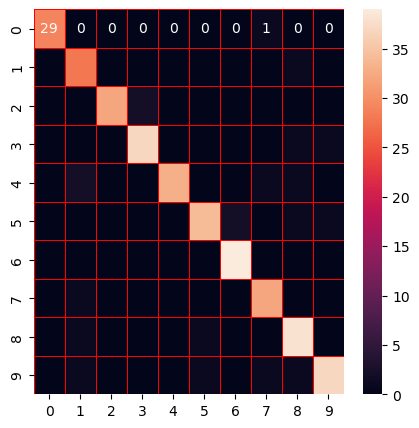

In [21]:
d,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.show()